# Приоритизация гипотез и анализ А/В-теста для интернет-магазина.

## Содержание:
 [Описание проекта](#1)
 
 [Часть 1. Приоритизация гипотез.](#2)
* [1. Фреймворк ICE.](#3)
* [2. Фреймворк RICE.](#4)
* [3. Сравнение результатов. Выводы.](#5)

[Часть 2. Анализ A/B-теста.](#6)
* [1. График кумулятивной выручки по группам.](#7)
* [2. График кумулятивного среднего чека по группам.](#8)
* [3. График относительного изменения кумулятивного среднего чека группы B к группе A.](#9)
* [4. График кумулятивного среднего количества заказов по группам.](#10)
* [5. График относительного изменения кумулятивного среднего количества заказов группы B к группе A.](#11)
* [6. Точечный график количества заказов по пользователям.](#12)
* [7. Вычисление 95-го и 99-го перцентилей количества заказов на пользователя. Выбор границы для определения аномальных пользователей.](#13)
* [8. Точечный график стоимостей заказов.](#14)
* [9. Вычисление 95-го и 99-го перцентилей стоимости заказов. Выбор границы для определения аномальных заказов.](#15)
* [10. Вычисление статистической значимости различий в среднем количестве заказов между группами по «сырым» данным.](#16)
* [11. Вычисление статистической значимости различий в среднем чеке заказа между группами по «сырым» данным. ](#17)
* [12. Вычисление статистической значимости различий в среднем количестве заказов между группами по «очищенным» данным.](#18)
* [13. Вычисление статистической значимости различий в среднем чеке заказа между группами по «очищенным» данным.](#19)

[Решение по результатам теста. Общие выводы](#20)

## Описание проекта <a class="anchor" id="1"></a>


В ходе проекта необходимо приоритизировать гипотезы, направленные на увеличение выручки крупного интернет-магазина, провести А/В тест и проанализировать его результаты. 

Проект выполняется в 2 частях: 1 - приоритизация гипотез, 2 - анализ А/В теста.

In [128]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
import scipy.stats as stats

## Часть 1. Приоритизация гипотез. <a class="anchor" id="2"></a>


In [129]:
# загрузим файл с гипотезами и ознакомимся с данными
try:
    hypothesis = pd.read_csv('hypothesis.csv')
except:
    hypothesis = pd.read_csv('https://code.s3.yandex.net/datasets/hypothesis.csv')

In [130]:
pd.options.display.max_colwidth = 130

In [131]:
hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


### 1. Фреймворк ICE.<a class="anchor" id="3"></a>

In [132]:
hypothesis['ICE'] = round((
    hypothesis['Impact']*
    hypothesis['Confidence']/
    hypothesis['Efforts']
),2)

In [133]:
print(hypothesis[['Hypothesis','ICE']].sort_values('ICE', ascending = False))

                                                                                                     Hypothesis  \
8                                                       Запустить акцию, дающую скидку на товар в день рождения   
0            Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей   
7              Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок   
6          Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию   
2  Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа   
1                                     Запустить собственную службу доставки, что сократит срок доставки заказов   
5                      Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов   
3           Изменить структура категорий, что увеличит конверсию, т.к. пользоват

In [134]:
print('Расчет приоритета по методу ICE показал что наивысший рейтинг у гипотезы "{}".'
      .format(hypothesis['Hypothesis'][8]))

Расчет приоритета по методу ICE показал что наивысший рейтинг у гипотезы "Запустить акцию, дающую скидку на товар в день рождения".


### 2. Фреймворк RICE.<a class="anchor" id="4"></a>

In [135]:
hypothesis['RICE']=(
    hypothesis['Reach']*
    hypothesis['Impact']*
    hypothesis['Confidence']/
    hypothesis['Efforts']
)

In [136]:
print(hypothesis[['Hypothesis','ICE','RICE']].sort_values('RICE', ascending = False)) #

                                                                                                     Hypothesis  \
7              Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок   
2  Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа   
0            Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей   
6          Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию   
8                                                       Запустить акцию, дающую скидку на товар в день рождения   
3           Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар   
1                                     Запустить собственную службу доставки, что сократит срок доставки заказов   
5                      Добавить страницу отзывов клиентов о магазине, что позвол

In [137]:
print('Расчет приоритета по методу RICE показал что наивысший рейтинг у гипотезы "{}".'
      .format(hypothesis['Hypothesis'][7]))

Расчет приоритета по методу RICE показал что наивысший рейтинг у гипотезы "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок".


### 3. Сравнение результатов. Выводы.<a class="anchor" id="5"></a>

Поскольку в фреймворке RICE  в расчете приоритета помимо показателей impact, confidence и efforts используется reach - охват, на первое место по показателю RICE вышла гипотеза "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок".

Без учета охвата эта гипотеза всего лишь на 3 месте.

## Часть 2. Анализ A/B-теста. <a class="anchor" id="6"></a>

In [138]:
# загрузим и изучим данные. При необходимости проведем предобработку.
try:
    orders = pd.read_csv('orders.csv')
    visitors = pd.read_csv('visitors.csv')
except:
    orders = pd.read_csv('https://code.s3.yandex.net/datasets/orders.csv')
    visitors = pd.read_csv('https://code.s3.yandex.net/datasets/visitors.csv')

In [139]:
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [140]:
visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [141]:
for x in [orders, visitors]:
    print(x.info())
    print()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB
None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB
None



In [142]:
# проверим данные на дубликаты
for x in [orders, visitors]:
    print(x.duplicated().sum())

0
0


In [143]:
for x in [orders, visitors]:
    print(x['group'].unique())

['B' 'A']
['A' 'B']


In [144]:
# приведем данные в колонках date  к типу данных datetime
orders['date'] = orders['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))
visitors['date'] = visitors['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

In [145]:
#проверим период времени за который доступны данные
orders.pivot_table(columns = 'group',values='date', aggfunc= ['min','max'])

min                   max           
group          A          B          A          B
date  2019-08-01 2019-08-01 2019-08-31 2019-08-31

In [146]:
visitors.pivot_table(columns = 'group',values='date', aggfunc= ['min','max'])

min                   max           
group          A          B          A          B
date  2019-08-01 2019-08-01 2019-08-31 2019-08-31

In [147]:
# проверим количество пользователей в каждой группе
orders.groupby('group').agg({'visitorId':'nunique'})

,visitorId
group,
A,503
B,586


In [148]:
# Проверим, есть ли пользователи, попавшие в обе группы
orders['intersections']=orders.query('group =="A"')['visitorId'].isin(orders.query('group =="B"')['visitorId'])



In [149]:
orders['intersections'].sum()

89

In [150]:
orders.query('intersections == True')['visitorId'].nunique()

58

А/Б тест проводился в течение всего августа 2019 года. В группах 503 и 586 пользователей. При этом 58 пользователей попали в обе группы, что может негативно сказаться на достоверности результатов сравнения групп.

In [151]:
# создаем массив уникальных пар значений дат и групп теста
datesGroups = orders[['date','group']].drop_duplicates()

# получаем агрегированные кумулятивные по дням данные о заказах 
ordersAggregated = (
    datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], 
                                                      orders['group'] == x['group'])]
                      .agg({'date' : 'max', 'group' : 'max', 'transactionId' : 'nunique', 
                            'visitorId' : 'nunique', 'revenue' : 'sum'}), axis=1)
    .sort_values(by=['date','group'])
)
# получаем агрегированные кумулятивные по дням данные о посетителях интернет-магазина 
visitorsAggregated = (
    datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], 
                                                        visitors['group'] == x['group'])]
                      .agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1)
    .sort_values(by=['date','group'])
)



# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
cumulativeData = (
    ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
)
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

cumulativeData.head(5)

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845


### 1. График кумулятивной выручки по группам.<a class="anchor" id="7"></a>

In [152]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders', 'visitors']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders','visitors']]




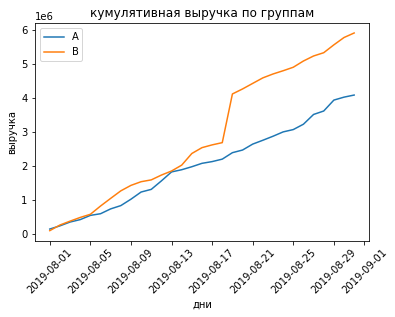

In [153]:
# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.xlabel('дни')
plt.ylabel('выручка')
plt.title('кумулятивная выручка по группам')
plt.xticks(rotation=45)
plt.legend()
plt.show()

Выручка в обеих группах стабильно растет, но в группе В 17 августа наблюдается резкий скачек, что скорее всего объясняется выбросами в коичестве покупок или среднему чеку.

### 2. График кумулятивного среднего чека по группам.<a class="anchor" id="8"></a>

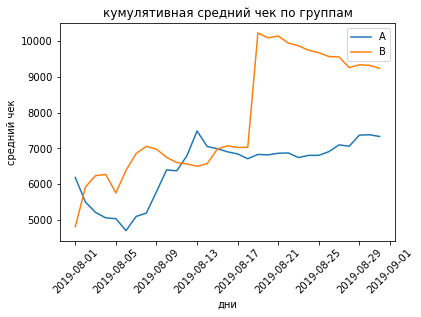

In [154]:
# Строим график среднего чека группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
# Строим график среднего чека группы В
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.xlabel('дни')
plt.ylabel('средний чек')
plt.title('кумулятивная средний чек по группам')
plt.xticks(rotation=45)
plt.legend()
plt.show()

Графики среднего чека к концу эксперимента становятся более стабильными. 17 августа также заметен сильный скачек в группе B, что вероятно связано с отдельной экстремально большой покупкой.

### 3. График относительного изменения кумулятивного среднего чека группы B к группе A.<a class="anchor" id="9"></a>

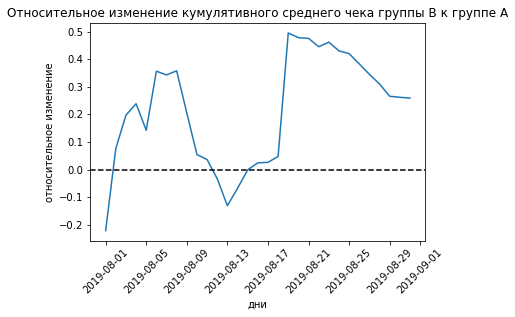

In [155]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue =cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date',right_on='date', how='left', suffixes=['A', 'B'])

# cтроим отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)
plt.xlabel('дни')
plt.ylabel('относительное изменение')
plt.title('Относительное изменение кумулятивного среднего чека группы В к группе А')
plt.xticks(rotation=45)
# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')
plt.show()

График относительного изменения кумулятивного среднего чека показывает в начале эксперимента нестабильность. Далее резкий выброс 17 августа, и постепенное последующее снижение отставания группы А. К концу эксперимента средний чек группы В выше примерно на 25%.

### 4. График кумулятивного среднего количества заказов по группам.<a class="anchor" id="10"></a>

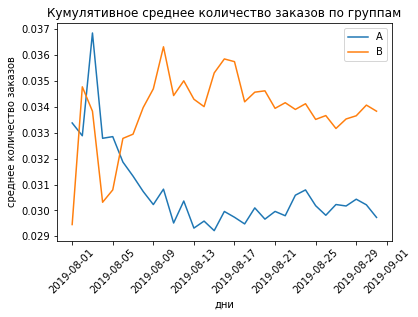

In [156]:
# Строим график среднего количества заказов группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['orders']/cumulativeRevenueA['visitors'], label='A')

# Строим график среднего количества заказов группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['orders']/cumulativeRevenueB['visitors'], label='B')
plt.xlabel('дни')
plt.ylabel('среднее количество заказов')
plt.title('Кумулятивное среднее количество заказов по группам')
plt.xticks(rotation=45)
plt.legend()
plt.show()

Графики среднего количесства заказов по группам показывают, что показатели группы В выше примерно на 5 заказов на каждую 1000 посещений.

### 5. График относительного изменения кумулятивного среднего количества заказов группы B к группе A.<a class="anchor" id="11"></a>

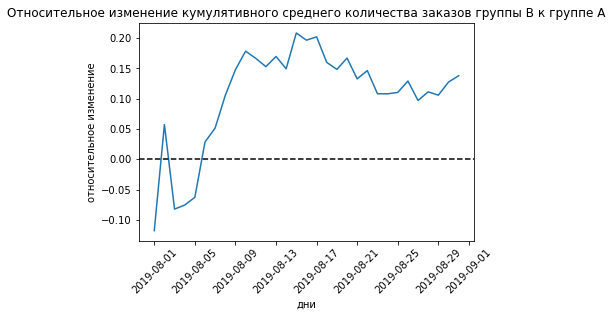

In [157]:

# cтроим отношение среднего количества заказов
plt.plot(mergedCumulativeRevenue['date'], ((mergedCumulativeRevenue['ordersB']/mergedCumulativeRevenue['visitorsB'])/(mergedCumulativeRevenue['ordersA']/mergedCumulativeRevenue['visitorsA'])-1))
plt.xticks(rotation=45)
plt.xlabel('дни')
plt.ylabel('относительное изменение')
plt.title('Относительное изменение кумулятивного среднего количества заказов группы B к группе A')
# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')
plt.show()

График относительного изменения среднего количества заказов также показывает что начиная с середины эксперимента кумулятивное среднее у группы В выше примерно на 15%.

### 6. Точечный график количества заказов по пользователям.<a class="anchor" id="12"></a>

In [158]:
# готовим данные для построения графика. Группируем таблицу с заказами по visitorId
ordersByUsers = orders.groupby('visitorId', as_index=False).agg({'transactionId': 'nunique'})


ordersByUsers.columns = ['visitorId', 'orders']


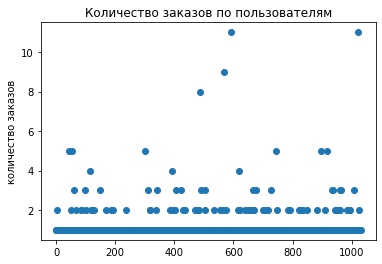

In [159]:
# строим точечный график
x_values = pd.Series(range(0,len(ordersByUsers)))

plt.scatter(x_values, ordersByUsers['orders']) 
plt.ylabel('количество заказов')
plt.title('Количество заказов по пользователям')
plt.show()

Основная масса покупателей ограничивались 1-2 заказами. Также видны явные выбросы в 5, 8 ,9 и даже 11 заказов, что может повлиять на результат одной из групп. 

### 7. Вычисление 95-го и 99-го перцентилей количества заказов на пользователя. Выбор границы для определения аномальных пользователей.<a class="anchor" id="13"></a>

In [160]:
print(np.percentile(ordersByUsers['orders'], [95, 99]))

[2. 4.]


1% всех пользователей совершили более 4 покупок. В качестве границы для отсечения аномальных пользователей определим порог 3 покупки. Все что выше - будем считать аномалиями.

### 8. Точечный график стоимостей заказов.<a class="anchor" id="14"></a>

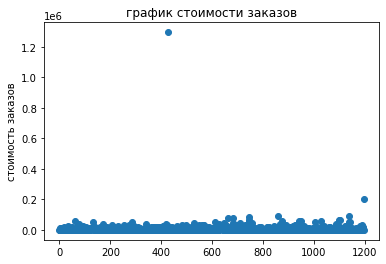

In [161]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.scatter(x_values, orders['revenue'])
plt.ylabel('стоимость заказов')
plt.title('график стоимости заказов')
plt.show()

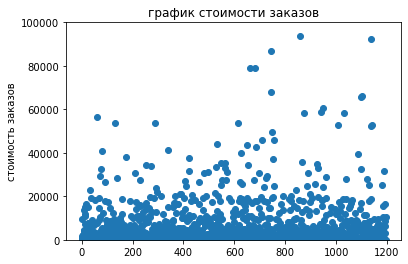

In [162]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.scatter(x_values, orders['revenue'])
plt.ylabel('стоимость заказов')
plt.title('график стоимости заказов')
plt.ylim([0,100000])
plt.show()

In [163]:
orders['revenue'].sort_values(ascending=False).head(5)

425     1294500
1196     202740
858       93940
1136      92550
744       86620
Name: revenue, dtype: int64

На графике видно экстремальное значение около 1,3 млн, что примерно в 430 раз больше медианы, которая составляет около 3000. Эта экстемально высокая покупка видимо является причиной выбросов которые мы видели на графиках.

### 9. Вычисление 95-го и 99-го перцентилей стоимости заказов. Выбор границы для определения аномальных заказов.<a class="anchor" id="15"></a>

In [164]:
print(np.percentile(orders['revenue'], [50, 95, 99]))

[ 2978.  28000.  58233.2]


Только 5 % покупок дороже 28000 рублей. Покупки больше 30000 рублей будем считать аномалиями.

### 10. Вычисление статистической значимости различий в среднем количестве заказов между группами по «сырым» данным.<a class="anchor" id="16"></a>

Здесь и далее будем сравнивать полученный уровень статистической значимости различий с пороговым значением alpha = 0.05.

Сформулируем нулевую гипотезу - статистически значимых различий в среднем количестве заказов между группами по «сырым» данным нет.

Альтернативная гипотеза - такие различия есть.

In [165]:
# подготовим таблицу с данными о куммулятивной и простой суммах выручки,
# заказов и количеству посетителей по дням для каждой группы

visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

data.head()

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,24,148579,21,101217,24,148579,21,101217,719,713,719,713
1,2019-08-02,20,93822,24,165531,44,242401,45,266748,619,581,1338,1294
2,2019-08-03,24,112473,16,114248,68,354874,61,380996,507,509,1845,1803
3,2019-08-04,16,70825,17,108571,84,425699,78,489567,717,770,2562,2573
4,2019-08-05,25,124218,23,92428,109,549917,101,581995,756,707,3318,3280


In [166]:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['userId', 'orders']

sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

print("{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print("{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))


0.017
0.138


P-value значительно ниже порогового значения, отвергаем нулевую гипотезу, то есть данные по количеству покупок в гуппе В отличаются от данных, полученных в группе А. Среднее количество покупок в группе В на 13,8%  выше. 

### 11. Вычисление статистической значимости различий в среднем чеке заказа между группами по «сырым» данным.<a class="anchor" id="17"></a>

Сформулируем нулевую гипотезу - статистически значимых различий в среднем чеке заказа между группами по «сырым» данным нет.

Альтернативная гипотеза - такие различия есть.

In [167]:
print('{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

0.729
0.259


P-value 0,729 - не получилось отвергнуть нулевую гипотезу. Статистически значимых различий в данных о среднем чеке нет. Однако средний чек в группе В выше на 25%. По результатам построения точесного рафика среднего чека мы поняли то в данных присутсвуют сильные выбросы.

### 12. Вычисление статистической значимости различий в среднем количестве заказов между группами по «очищенным» данным.<a class="anchor" id="18"></a>

Сформулируем нулевую гипотезу - статистически значимых различий в среднем количестве заказов между группами по «очищенным» данным нет.

Альтернативная гипотеза - такие различия есть.

In [168]:
# выведем "ненормальных" пользователей в отдельный датафрейм
# в качестве "ненормальных" возьмем пользователей, совершивших более 3 заказов 
# и пользователей, купивших более чем на 30000, а также тех, кто попал сразу в обе группы
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 3]['userId'],
        ordersByUsersB[ordersByUsersB['orders'] > 3]['userId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > 30000]['visitorId']

usersInBothGroups = orders[orders['intersections']==True]['visitorId']

abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders,usersInBothGroups], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormalUsers.shape[0])
abnormalUsers.head()

100


703       8300375
1099    148427295
18      199603092
928     204675465
1013    232979603
dtype: int64

In [169]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

In [170]:
print('{0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

0.013
0.161


Данные после отчистки от аномальных пользователей принципиально не изменились. По прежнему отвергаем нулевую гипотезу. Группы отличаются по среднему количеству заказов. 

После отчистки лидерство группы бы урепилоль. Среднее количество заказов в ней больше на 16% по сравнению с группой А

### 13. Вычисление статистической значимости различий в среднем чеке заказа между группами по «очищенным» данным.<a class="anchor" id="19"></a>

Сформулируем нулевую гипотезу - статистически значимых различий в среднем чеке заказа между группами по «очищенным» данным нет.

Альтернативная гипотеза - такие различия есть.

In [171]:
print(
    '{0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print(
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
)

0.842
-0.031


Удаление аномальных значений позволило однозначно сделать вывод о том, что различий по среднему чеку медну группами нет. 

## Решение по результатам теста. Общие выводы.<a class="anchor" id="20"></a>

Для анализа было представлено набор данных по заказам и посещениям пользователей в период августа 2019 года. Пользователи были разделены на 2 группы, для одной (группа В) применялись изменения в рамках тестируемой гипотезы. Группа А выступала контрольной. Задачей исследования являлось установить - успешен ли проведенный тест. Исть ли статистически значимые улочшения по бизнес параметрам в группе В по сравнению с группой А.

По проведенному анализу результатов теста можно сделать следующие выводы: тест необходимо остановить, зафиксировать победу группы В.
Анализ показал что среднее количество заказов в группе В больше на 16 %.

По результатам сравнения групп по среднему количеству заказов, с использованием критерия Манна-Уитни установлено статистически-значимое различие групп. 

Различий по размеру среднего чеку у групп не зафиксированно.

По результатам проведенного ислледования можно дать рекомендацию внедрить изменения тестировавшиеся на группе В в продукт, это вероятно позволит повысить среднее количество заказов и выручку.